In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\namrata kumari gupta\OneDrive\Documents\employee_data.csv")
# Display first 5 rows
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
df.shape

(48842, 15)

In [3]:
print("\nColumn Names:\n", df.columns.tolist())


Column Names:
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
print("\nNull Values in Each Column:")
print(df.isnull().sum())


Null Values in Each Column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [6]:
# Drop rows with null values (you can use imputation instead if needed)
df = df.dropna()

# Confirm nulls removed
print("\nNulls after cleaning:")
print(df.isnull().sum())




Nulls after cleaning:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [7]:
df.shape


(48842, 15)

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


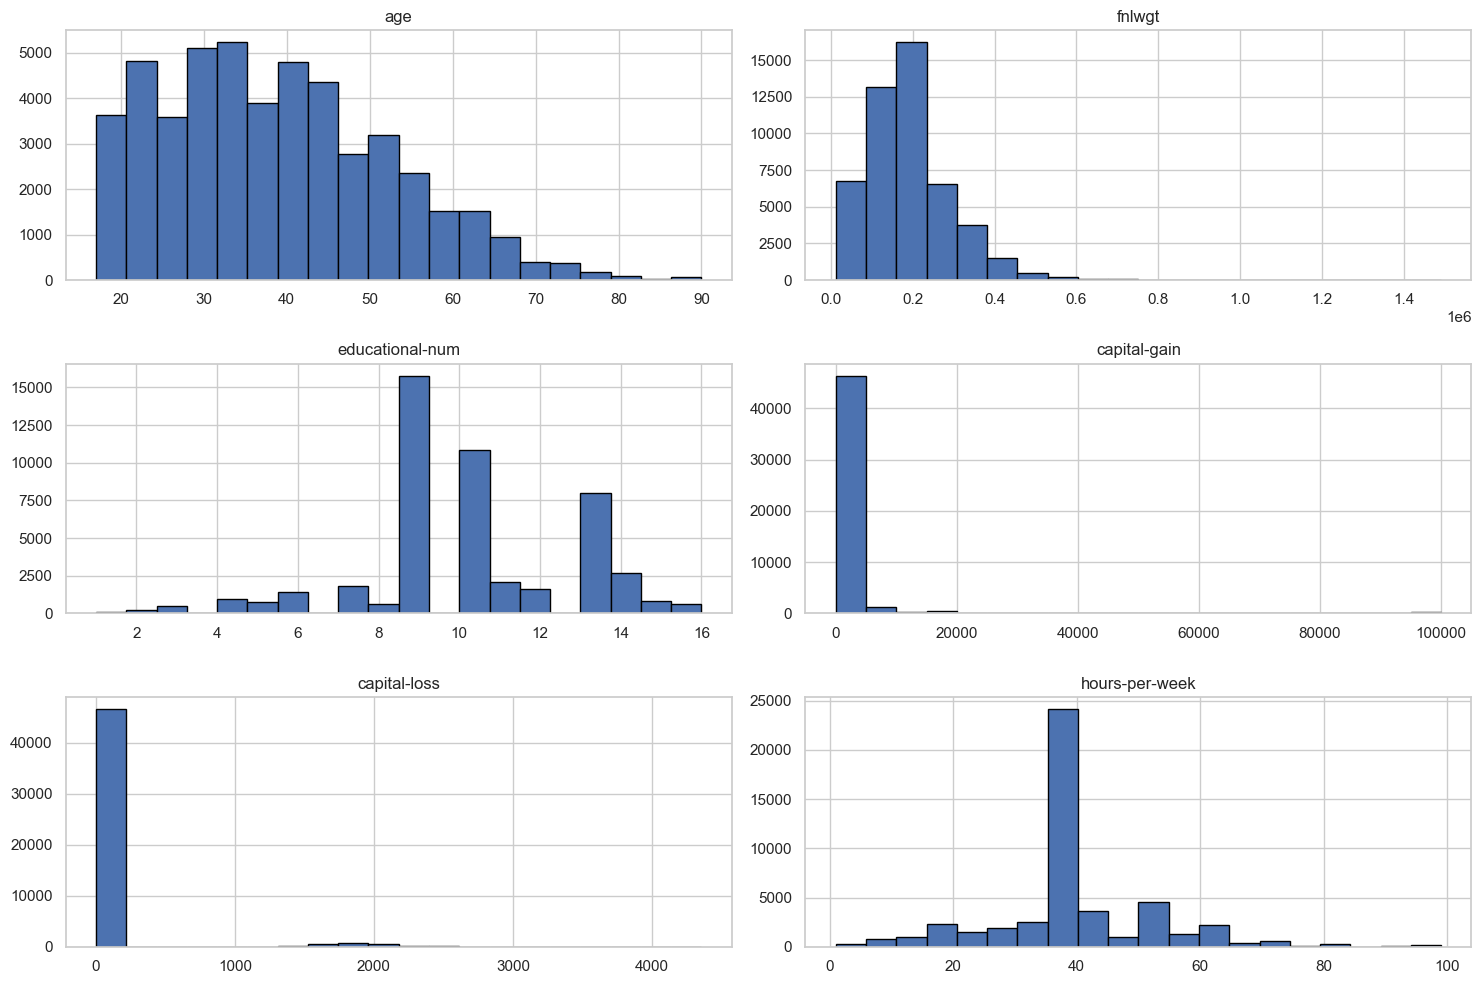

In [9]:
# Plot histograms for all numeric columns
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


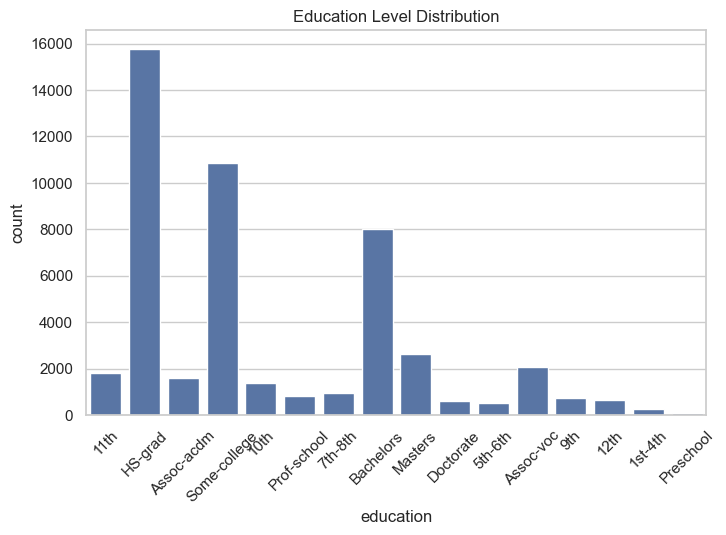

In [10]:
# Example for 'education' column
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education',)
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.show()


In [11]:
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


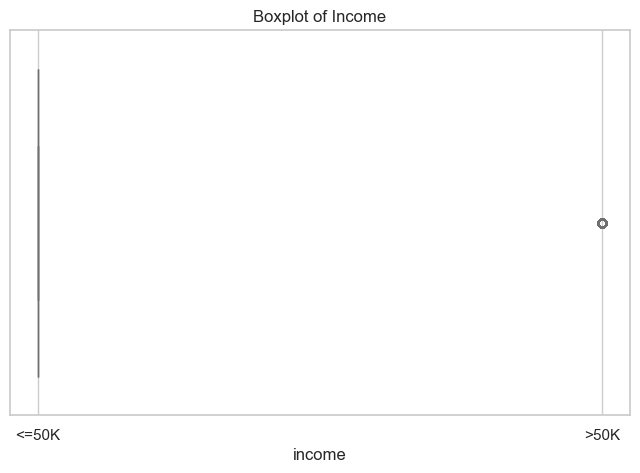

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['income'], color='skyblue')
plt.title("Boxplot of Income")
plt.show()


In [13]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


In [14]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid changing the original
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Categorical Columns:
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [16]:
# Drop the target column 'income' to get features (X), and isolate target (y)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


In [18]:
# Convert scaled features back into a DataFrame for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show the first 5 rows
X_scaled_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995129,0.088484,0.351675,-2.397350,-1.197259,0.916138,0.099824,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.289462
1,-0.046942,0.088484,-0.945524,0.183660,-0.419335,-0.410397,-0.372938,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.289462
2,-0.776316,-1.277432,1.394723,-0.848744,0.747550,-0.410397,1.045346,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.289462
3,0.390683,0.088484,-0.277844,1.216063,-0.030373,-0.410397,0.099824,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.289462
4,-1.505691,-2.643348,-0.815954,1.216063,-0.030373,0.916138,-1.554840,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.289462


In [19]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Show the shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (39073, 14)
Testing set shape: (9769, 14)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Copy original DataFrame
df_encoded = df.copy()

# Automatically detect categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

print("Categorical Columns to Encode:", categorical_cols.tolist())

# Apply label encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # save encoder if needed for inverse transform

# Preview encoded data
df_encoded.head()


Categorical Columns to Encode: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [21]:
# Features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: check scaled output
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995129,0.088484,0.351675,-2.397350,-1.197259,0.916138,0.099824,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.289462
1,-0.046942,0.088484,-0.945524,0.183660,-0.419335,-0.410397,-0.372938,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.289462
2,-0.776316,-1.277432,1.394723,-0.848744,0.747550,-0.410397,1.045346,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.289462
3,0.390683,0.088484,-0.277844,1.216063,-0.030373,-0.410397,0.099824,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.289462
4,-1.505691,-2.643348,-0.815954,1.216063,-0.030373,0.916138,-1.554840,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.289462


In [23]:
from sklearn.model_selection import train_test_split

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (39073, 14)
X_test shape: (9769, 14)
y_train distribution:
 income
0    0.76073
1    0.23927
Name: proportion, dtype: float64
y_test distribution:
 income
0    0.760672
1    0.239328
Name: proportion, dtype: float64


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)



In [25]:
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = model.predict(X_test)


In [27]:
# Show first 10 predictions
print("Predicted:", y_pred[:10])
print("Actual:   ", y_test.values[:10])


Predicted: [0 0 1 0 1 0 1 0 0 0]
Actual:    [0 0 0 0 1 0 1 0 1 0]


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

Accuracy Score: 0.8612


In [30]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7431
           1       0.75      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



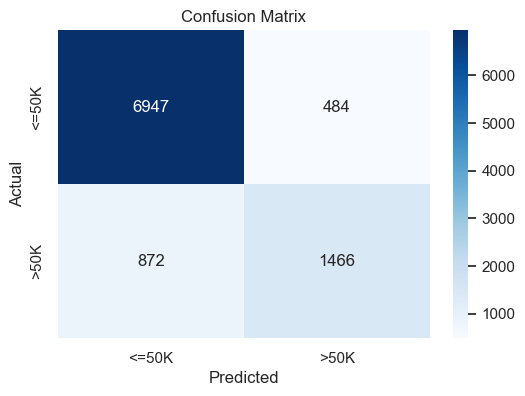

In [31]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df.columns = df.columns.str.strip()



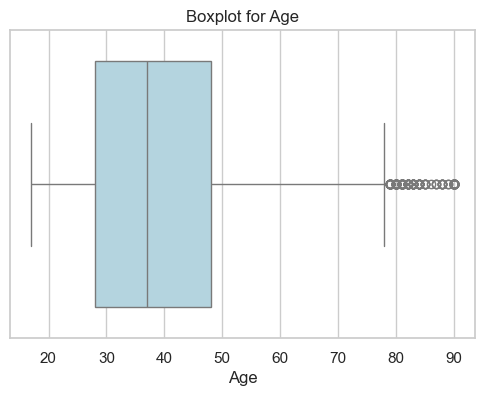

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'], color='lightblue')
plt.title("Boxplot for Age")
plt.xlabel("Age")
plt.show()

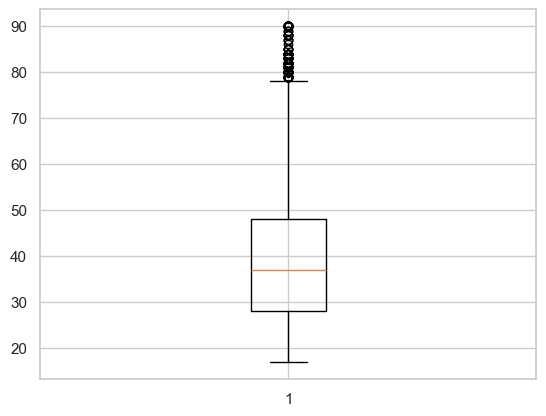

In [35]:
plt.boxplot(df['age'])
plt.show()

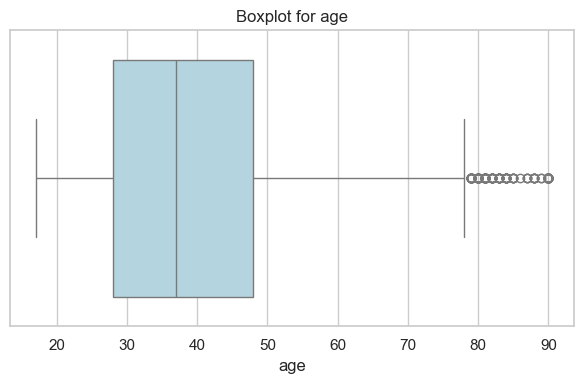

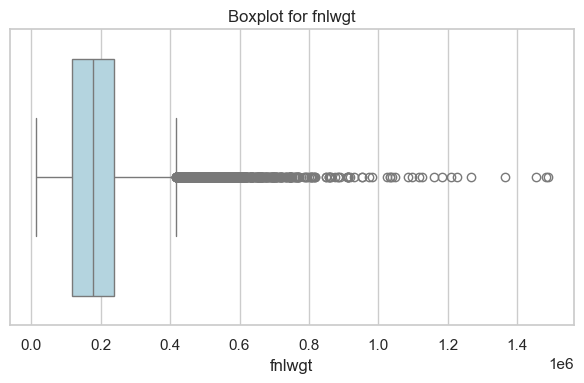

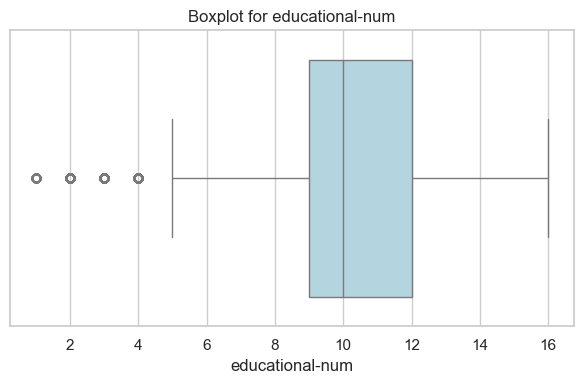

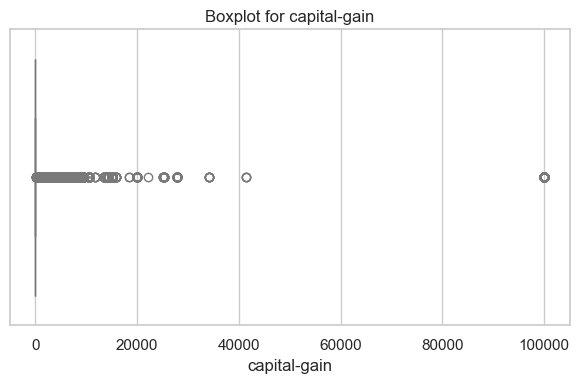

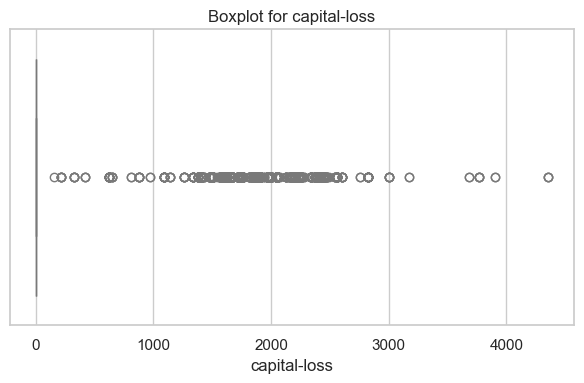

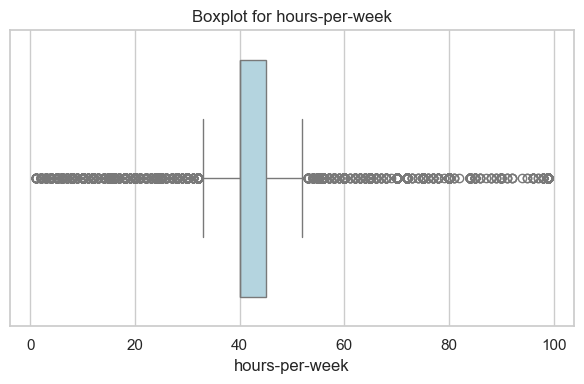

In [36]:
#Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 📊 Train, Predict, and Evaluate
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n🟢 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



🟢 Logistic Regression Accuracy: 0.8312
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7431
           1       0.74      0.45      0.56      2338

    accuracy                           0.83      9769
   macro avg       0.79      0.70      0.73      9769
weighted avg       0.82      0.83      0.82      9769


🟢 Random Forest Accuracy: 0.8599
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7431
           1       0.75      0.62      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.86      9769


🟢 K-Nearest Neighbors Accuracy: 0.8323
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7431
           1       0.67      0.59      0.63      2338

    accuracy                           0.83      9769
   macro avg  

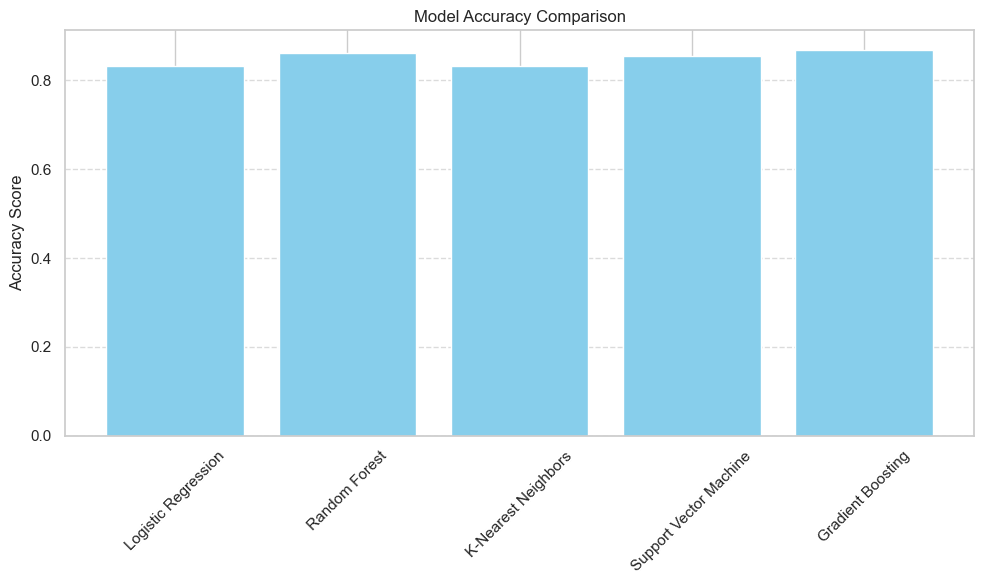

In [40]:
import matplotlib.pyplot as plt

# 📊 Plotting Model Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:

 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # scale features
    ('logreg', LogisticRegression(max_iter=10000))     # increase iterations
])
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [43]:
LogisticRegression(max_iter=20000)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,20000
,multi_class,'deprecated'


In [44]:
LogisticRegression(max_iter=20000)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,20000
,multi_class,'deprecated'


In [45]:
# Define features and target
x = df_encoded.drop('income', axis=1)  # Drop the target column to get features
y = df_encoded['income']               # Target column


In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
# Assuming df is your original DataFrame
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])



LogisticRegression Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769


RandomForest Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.74      0.65      0.69      2290

    accuracy                           0.87      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.87      0.86      9769


KNN Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7479
           1       0.66      0.60      0.63      2290

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76 

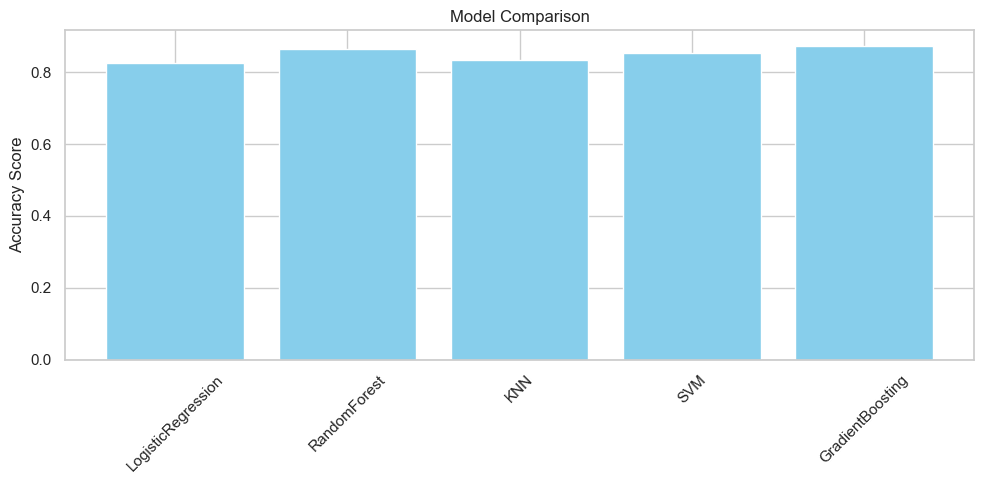

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Example dataset variables — replace 'x' and 'y' with your actual feature and target variables
# x = df.drop(['salary'], axis=1)  # example
# y = df['salary']

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models using pipeline (for scaling where needed)
models = {
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=20000))
    ]),
    "RandomForest": RandomForestClassifier(),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC())
    ]),
    "GradientBoosting": GradientBoostingClassifier()
}

# Train, evaluate, and collect results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

# Plotting the model accuracies
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
x = df_encoded.drop('income', axis=1)
y = df_encoded['income']


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split your dataset (make sure x and y are defined beforehand)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models using pipelines (only those that need scaling)
models = {
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(solver='lbfgs', max_iter=5000))
    ]),
    "RandomForest": RandomForestClassifier(),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC())
    ]),
    "GradientBoosting": GradientBoostingClassifier()
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8272
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769

RandomForest Accuracy: 0.8601
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.73      0.63      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.86      9769

KNN Accuracy: 0.8334
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7479
           1       0.66      0.60      0.63      2290

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.

In [51]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
import joblib
joblib.dump(model, 'salary_model.pkl')


['salary_model.pkl']

In [53]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.4538
Mean Squared Error: 0.10


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Make sure 'x' is your feature set

# Train-test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=5000, solver='liblinear'),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.8272
RandomForest: 0.8629
KNN: 0.8335
SVM: 0.8556
GradientBoosting: 0.8736

✅ Best model: GradientBoosting with accuracy 0.8736
✅ Saved best model as best_model.pkl


In [55]:
import pandas as pd

df = pd.read_csv(r"C:\Users\namrata kumari gupta\OneDrive\Documents\employee_data.csv")
print(df.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# Load the dataset
df = pd.read_csv(r"C:\Users\namrata kumari gupta\OneDrive\Documents\employee_data.csv")

# Select relevant features
X = df[['age', 'education', 'occupation', 'hours-per-week']]  # ✅ No experience

# Fit OneHotEncoder on categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X[['education', 'occupation']])

# Fit StandardScaler on numeric columns
scaler = StandardScaler()
scaler.fit(X[['age', 'hours-per-week']])

# Save both fitted objects
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Successfully fitted and saved encoder.pkl and scaler.pkl")


✅ Successfully fitted and saved encoder.pkl and scaler.pkl


In [57]:

print(df.columns)



Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [58]:
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv(r"C:\Users\namrata kumari gupta\OneDrive\Documents\employee_data.csv")  # Replace with your actual filename

# ✅ Select features and target
X = df[['age', 'education', 'occupation', 'hours-per-week']]
y = df['income']  # Classification target: <=50K or >50K

# ✅ Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 0 and 1

# ✅ Preprocessing for features
categorical_cols = ['education', 'occupation']
numerical_cols = ['age', 'hours-per-week']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# ✅ Create pipeline with classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# ✅ Split data (optional for training/testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ✅ Train the model
model.fit(X_train, y_train)

# ✅ Save all artifacts
joblib.dump(model, "model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("✅ Model and encoder saved successfully.")


✅ Model and encoder saved successfully.


In [59]:
import os
print(os.path.exists("model.pkl"))   # should return True
print(os.path.exists("encoder.pkl")) # should return True
print(os.path.exists("scaler.pkl"))  # should return True


True
True
True


In [60]:
import pandas as pd
import joblib


In [61]:
import pandas as pd
import numpy as np
import joblib
import streamlit as st

# Load the model, encoder, and scaler
try:
    model = joblib.load("model.pkl")
    encoder = joblib.load("encoder.pkl")
    scaler = joblib.load("scaler.pkl")
except FileNotFoundError as e:
    st.error(f"❌ Required model file not found: {e}")
    st.stop()

st.title("👩‍💻 ML Based Salary Prediction")

uploaded_file = st.file_uploader("📤 Upload a CSV file for Batch Prediction", type=["csv"])

if uploaded_file is not None:
    try:
        input_df = pd.read_csv(uploaded_file)

        required_columns = ['age', 'education', 'occupation', 'hours-per-week']
        if not all(col in input_df.columns for col in required_columns):
            st.error(f"❌ CSV must contain columns: {required_columns}")
            st.stop()

        # Keep only necessary columns
        input_df = input_df[required_columns]

        # Separate categorical and numerical
        cat_cols = ['education', 'occupation']
        num_cols = ['age', 'hours-per-week']

        # Encode and scale
        encoded = encoder.transform(input_df[cat_cols])
        scaled = scaler.transform(input_df[num_cols])

        # Combine features
        processed = np.hstack([scaled, encoded])

        # Predict
        predictions = model.predict(processed)
        input_df['Predicted Salary Class'] = predictions

        # Show and allow download
        st.success("✅ Prediction completed!")
        st.dataframe(input_df)

        csv = input_df.to_csv(index=False).encode('utf-8')
        st.download_button("⬇️ Download Predictions", data=csv, file_name="predicted_salaries.csv")

    except Exception as e:
        st.error(f"❌ Error during prediction: {e}")


2025-07-22 17:41:48.145 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 17:41:49.414 
  command:

    streamlit run C:\Users\namrata kumari gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-22 17:41:49.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 17:41:49.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 17:41:49.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 17:41:49.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 17:41:49.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
20